# Thinkful - Final Capstone: Siting Wind Farms

## Datasets and Unsupervised Learning model

### Jeremy Brezovan, December 2019


My parents still live in the bedroom community in which I was raised, in north central Iowa. On a trip home this summer, my dad and I talked about the large number of turbines that have popped up in the farmland south of town in the past decade (I have since learned these turbines are collectively named the [Lundgren Project](https://eerscmap.usgs.gov/uswtdb/viewer/#11.76/42.3582/-94.1259)). Dad and I wondered how these fields were chosen as a location for so many turbines.


## What is the problem you are attempting to solve?

__For this capstone, I would like to build a model to determine strong candidate sites for new wind farms.__


## How is your solution valuable?
__Renewable energy, including wind, is a growing business.__ [This wind energy factsheet from the University of Michigan](http://css.umich.edu/factsheets/wind-energy-factsheet) contains a lot of great information, including the following graph, which shows the steady increase in windpower capacity in the US since the year 2001:


![Growth of wind energy in the US](http://css.umich.edu/sites/default/files/styles/factsheet_image/public/Figure%203%20Cumulative%20Wind%20Capacity.png?itok=ukF-S7vG)

Current US capacity is 96.7 GW--1 GW is roughly enough to power around 725,000 homes (discussion about that number [here](https://www.quora.com/How-many-homes-can-one-gigawatt-in-energy-capacity-provide-for)), so current capacity can power well over 70 million homes. Capacity could increase to cover 20% of all US energy needs by 2030, and 35% by 2050 (also from the U of M factsheet).

__A model like the one I propose could be useful to multiple stakeholders in potential wind energy projects:__
* Investors looking for optimal locations for new wind farms, who can more easily identify and prioritize potential sites;
* Turbine manufacturers interested in submitting proposals for projects could use this model to help them determine which of their products would be more suitable (in terms of height and output capacity, for instance);
* The general public, by quantifying and illustrating the reasons why particular sites are favored over others. The placement of wind farms has been an occasionally contentious issue, particularly for residents who live in proximity to a selected site, or who have concerns about turbines’ effects on local wildlife.

With additional work, this model could serve as the core of a tool where a user could enter the GPS coordinates of a point or area, and receive up-to-date information about that site’s viability.


## What is your data source and how will you access it?
At least four major factors come into play when siting a wind project, according to the [American Wind Energy Association](https://www.awea.org/wind-101/siting-a-project). Scope and data availability may limit the number of factors actually used in this capstone:


1. __Strong and consistent winds;__
2. __Large, open space, such as agricultural land.__ [NREL has datasets](https://www.nrel.gov/gis/data-wind.html) featuring “wind power classes” derived from both mean wind speeds and basic topographic features--the shapefile that includes data for the entire US, excluding areas unsuited to wind farm construction due to topography, will be used here. If found, additional data about topography and population density may also be sourced, but the US dataset “with exclusions” has already removed “protected areas (wilderness, wildlife refuges, parks, etc.), incompatible land use (wetlands, urban areas), and other criteria from the available wind resource”;
3. __Minimal risk to wildlife.__ This includes both birds and bats, [which can be especially hard-hit by poorly tuned wind farms](http://www.anthropocenemagazine.org/2017/03/wind-energy-bat-deaths); use data for migratory bird/bat populations, or locations of flyways, and see which areas have a higher population density--[the US Fish and Wildlife Service](https://www.fws.gov/birds/management/flyways.php) has basic shape files outlining the four main flyways of the continental US, but does not further break them down to specific flight paths. The more I read about this factor, the more it felt that it was a topic of research for each proposed wind project and unfortunately does not immediately lend itself well to automation/machine learning;
4. __Community acceptance.__ If written community survey/commentary was available for an area, sentiment analysis could help determine acceptance. Lacking available data, I scanned Twitter hashtags ([#windpower](https://twitter.com/hashtag/windpower?lang=en), [#windenergy](https://twitter.com/hashtag/windenergy?lang=en), [#windfarm](https://twitter.com/hashtag/windfarm?lang=en)) hoping to find discussions that could be analyzed instead. Unfortunately, I mostly found wind energy company tweets, and retweets by proponents. Wind farm opponents were typically found outside of the US. In a recent example that generated some discussion, a wind project already underway in Ontario, Canada was halted, and the partially-completed construction removed from the site, [over concerns about the impact of the project on the local bat population](https://ottawacitizen.com/news/local-news/ontario-cancels-nearly-built-200m-wind-farm-over-threat-to-bat-populations).

__Additional factors could include:__
* __Proximity to transmission lines that can carry the generated power to customers__ (data available as a shapefile on the [Homeland Infrastructure Foundation website](https://hifld-geoplatform.opendata.arcgis.com/datasets/electric-power-transmission-lines));
* __Placement to minimize “shadow flicker”__, the repetitive shadow cast on nearby homes and business by rotating blades, usually during sunrise and sunset. Given the height of an average turbine and the location of the sun on the horizon at sunrise/sunset throughout an average year, some basic calculations could define a buffer zone that would guarantee shadow flicker from a given turbine is minimized. This may be too much detail for this capstone, but in a more advanced version of this tool, a site such as [suncalc.org](https://www.suncalc.org/#/44.9537,-93.2199,3/2019.12.12/19:48/1/3) (and its [API](https://www.torsten-hoffmann.de/apis/suncalcmooncalc/link_en.html)) may be able to provide the information about the sun’s angles relative to the horizon throughout the year.

AWEA goes into more detail about the overall resource assessment process [here](http://awea.org/wind-101/siting-a-project/resource-assessment). CRC Press also has [an article about siting wind farms](https://www.crcpress.com/blog/article/how-to-select-a-location-for-a-wind-farm), though unfortunately links to some of their suggested data sources appear to be stale.


## What techniques from the course do you anticipate using?
NREL’s wind class dataset is a representation of the lower 48 states as a grid, with cells ¼ degree of latitude by ⅓ degree of longitude.

__A supervised model__ using data from the above sources will be trained, with the locations of existing wind projects (extracted from [Berkeley Lab’s database of US Wind Turbines](https://emp.lbl.gov/news/largest-ever-database-us-wind-turbines)) as a target.

For each cell in the NREL data that contains turbines, the supervised model can use NREL’s wind class, and features derived from other data sources (details about some of these features are discussed below), to predict which other cells would be best suited to wind farm development.

### In the following map, wind classes are shown in grey - green - blue - orange, with orange being the highest class. Locations of existing turbines are in red:

![Map showing NREL wind class and turbine locations](./Screenshot_2019-12-12_21-04-13.png)

Another useful feature will be based on the distance between a given cell and suitable transmission lines. The ability to piggyback on existing infrastructure can cut the costs for a new wind project. States east of the Mississippi River will have the easiest time here, despite having few sites with an NREL wind class of 3 or above. Parts of the West (roughly Montana, Idaho, Wyoming, Utah, and Colorado) will have longer mean distances to transmission lines.

I'd like to create some kind of weight based on density of transmission lines, in addition to measuring proximity. My idea is that being close to more lines is better, but only to a point--past this point, a density of transmission lines probably indicates high population density (see: [the Northeast megalopolis](https://en.wikipedia.org/wiki/Megalopolis#/media/File:BosWash-Night-Labeled.png)). Proximity should be penalized in this case.

The [codebook](https://emp.lbl.gov/publications/us-wind-turbine-database-files) for the US Wind Turbine Database lists a number of potentially useful attributes that could be fed to __an unsupervised learning model__.

These project/turbine attributes in particular could lend themselves well to a way to classify locations by the type of projects/turbines already installed.

* p_name - project name
* p_year - year project became operational
* p_tnum - number of turbines in project
* p_cap - project capacity (MW)
* t_manu - turbine original equipment manufacturer
* t_model - turbine model
* t_cap - turbine capacity (kW)
* t_hh - turbine hub height (meters)
* t_rd - turbine rotor diameter (meters) 
* t_rsa - turbine rotor swept area (meters^2)
* t_ttlh - turbine total height - calculated (meters)
* t_conf_atr - turbine characteristic confidence (0-3)
* t_conf_loc - location confidence (0 -3)

The output from the unsupervised learning model could be treated as a classification of the type of turbines suitable for a location. This will serve as an additional input feature for the supervised learning model.

Power output is an especially important factor to consider--for instance, in my initial analysis, I noticed that the sites for many turbines, particularly in central and southern Texas, do not line up with NREL’s wind classes for large-scale use. Despite being #1 in number of turbines deployed, Texas’ mean power output per turbine is below that of #3 state, Iowa.

## What do you anticipate to be the biggest challenge you’ll face?
Time, and resources are my primary concerns.

In order to save some time, and definitely to save resources, I’d like to limit this model to just the contiguous 48 states. Wind and solar will play a necessary part in the future of renewable energy in remote locales like Hawaii, Alaska, and Puerto Rico--but focusing on the "lower 48" for the purposes of this capstone will lessen the load on my PC. (Looking forward--besides making this tool more interactive, and incorporating data for other parts of the world, another future improvement would be to deploy it to the cloud, where resources can be called upon as needed.)

## Imports and functions

In [297]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from pylab import *
import seaborn as sns
import time
import re

from shapely.geometry import Polygon
from shapely import ops as sop

import hdbscan

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from statistics import mode

pd.set_option('display.max_columns', None)

%matplotlib inline

In [298]:
def model_comparison(model,df,cluster_df,y_pred):
# Add cluster counts to the legend
    unique, counts = np.unique(y_pred,return_counts=True)
    plot_labels = pd.DataFrame(counts,columns=['count'],index=unique)
    cluster_colname = 'turbine_class'

# See which variables in the dataset are correlated with the cluster
    clust_corr = df.corr()
    cluster_text = str(clust_corr[cluster_colname].sort_values(ascending=False).head(20))

# Use PCA to reduce the dataframe used for clustering to 2 variables and plot the clusters
    sns.set_style('white')
    clust_PCA = PCA(2).fit_transform(cluster_df)
    clust_PCA = pd.concat([pd.DataFrame(clust_PCA),pd.Series(y_pred)],axis=1)
    clust_PCA.columns = ['pca1','pca2',cluster_colname]
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
    fig.suptitle('Clusters created by {}, and correlated features'.format(str(model).split('(')[0]),
                 fontweight='bold')
    
    ax1.axis('off')
    ax1.text(0, 0, cluster_text,
             verticalalignment='bottom', horizontalalignment='left',
             fontsize=12)
    ax2 = sns.scatterplot('pca1','pca2',data=clust_PCA,
                          hue=cluster_colname,alpha=.5,
                          palette='rainbow',
                         )
    legend = ax2.legend_
    legend.get_texts()[0] = 'Cluster - count'
    labels = ['{} - {}'.format(i,j) for i,j in zip(plot_labels.index,plot_labels['count'])]
    for i, label in enumerate(labels):
        legend.get_texts()[i+1].set_text(label)
    return clust_PCA

In [299]:
# This function only works with models where the number of clusters must be defined.
# I owe an awful lot to the scikit-learn documentation for this function.
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def silhouette_plot(pca_df,model,range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == 'km':
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        else:
            raise ValueError("{} is not a valid model. Try 'km' or 'spc'.")

        cluster_labels = clusterer.fit_predict(pca_df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(pca_df, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(pca_df['pca1'], pca_df['pca2'], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    plt.close()

In [300]:
def turbine_color(turbine_class):
    if turbine_class == 0:
        return 'limegreen'
    elif turbine_class == 1:
        return 'gold'
    elif turbine_class == 2:
        return 'orangered'
    else:
# Blue dots on the map mean shenanigans occurred and we need to investigate
        return 'blue'

In [301]:
def score_distribution(df,column):
    cluster_pos_stats = df['turbine_class'].value_counts()
    classes = existing_lower48['turbine_class'].unique()
    number_of_subplots = len(classes)

    fig, axes = plt.subplots(1, 1, sharey=True,figsize=(15,5))
    
    for i,v in enumerate(classes):
        this_cluster_df = df.loc[df['turbine_class'] == v]
        ax1 = subplot(1,number_of_subplots,v+1)
#        ax1.plot(x,y)
        sns.distplot(this_cluster_df[column],
                     ax=ax1,
                     label=v,
                     kde=False,
                     bins=30,
                     color=turbine_color(v),
                     hist_kws={'log':True},
                    )
        plt.xlabel('{}, class {}'.format(column,v))
    labels = ['{0} - {1} ({2:1.2f}%)'.format(i,j,k) \
              for i,j,k in zip(cluster_pos_stats.index,
                               cluster_pos_stats.values,
                               (100.*cluster_pos_stats/cluster_pos_stats.sum()))
             ]
#    legend = plt.legend(labels=labels)
#    legend.set_title('turbine_class - count (pct)')
    
    plt.ylabel('count')
    plt.suptitle("Distribution of {}, by turbine_class".format(column))
    plt.show()
    plt.close()

In [302]:
def turbine_class_color_map(turbines,borders):
    fig = plt.figure()
    ax = borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')

    scatter = ax.scatter(turbines['xlong'],turbines['ylat'],
                color=turbines['turbine_class'].apply(lambda x: turbine_color(x)),
                alpha=.5)

    unique, counts = np.unique(turbines['turbine_class'],return_counts=True)
    plot_labels = pd.DataFrame(counts,columns=['count'],index=unique)
    labels = ['{} - {}'.format(i,j) for i,j in zip(plot_labels.index,plot_labels['count'])]

    legend_handles = []
    for turbine_class in unique:
        legend_handles.append(Patch(facecolor=turbine_color(turbine_class), edgecolor='b',
                                              label=labels[turbine_class]))

    legend1 = ax.legend(handles=legend_handles,
                        labels=labels,
                        loc="lower left", title="turbine_class - count",
                        title_fontsize=20,fontsize=16)
    ax.add_artist(legend1)
    plottitle = plt.title('Existing wind turbines in the continental US, by turbine_class',fontsize=20)
    plt.show()
    plt.close()

## Input data

I searched for datasets representing as many of AWEA's factors for siting turbines as I could find, hoping to cover all of the major factors. Here are the four I ended up using for this project:

1. US state and national borders. 
2. Existing turbines in the US.
3. Existing power lines in the US.
4. NREL wind data. Locations are ranked by class, 1-7. Topography is factored into the calculation of class.

Let's explore these datasets individually, then combine features so we can train models to predict good locations for new turbines.

### 1. US state and national borders

Found a shapefile of US borders on [data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-state-and-equivalent-national)--this will serve as the base of most of the static maps.

This dataset has some other interesting features, like the area of land and water for a given state, but for our purposes only the 'geometry' feature, representing each state's borders, is relevant.

To make things somewhat simpler, let's focus on the 48 contiguous states (so, skip Alaska and Hawaii). 

In [303]:
borders = gpd.read_file("./tl_2017_us_state/tl_2017_us_state.shp")

In [304]:
lower48_borders = borders.loc[(borders['REGION'] < '5') & (~borders['STUSPS'].isin(['AK','HI']))]\
                         .to_crs({'init': 'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [305]:
lower48_borders.loc[~lower48_borders['STUSPS'].isin(['HI','AK'])]

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


In [306]:
# I became really conscious of memory use as I worked,
# and began deleting objects I will no longer use.
del borders

Check the coordinate reference system (CRS) used for this dataset. We'll need to make sure this value matches across all of our datasets.

The NREL wind dataset uses: {'init': 'epsg:4326'}, and it's the largest dataset by far, so convert to that CRS.

In [307]:
print(lower48_borders.crs)

{'init': 'epsg:4326'}


### The x-most points of the US (northernmost/southernmost/etc.)

Wikipedia maintains a helpful list of [the northernmost/southernmost/etc. points of the continental US](https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States).

We can use these points to outline a polygon that serves as a quick filter, reducing the other datasets to focus on just the contiguous 48 states. A spatial join using the actual borders would be the most accurate, but a single, simple shape should make for faster calculations.

Add a half of a degree to the westernmost longitude and southernmost latitude, so we can capture offshore sites along the Pacific coast, and south of Florida. (Geography makes this adjustment unnecessary along the Atlantic coast, and the northern border.)

__Note:__ each degree of latitude/longitude is approximately 69 miles (111 kilometers) apart--this is not strictly true away from the equator, but for our purposes, this estimate is fine.

In [308]:
# North: the Northwest Angle, MN
northernmost = {'lat': 49.384472,'long': -95.153389}

# South: Key West, FL
southernmost = {'lat': 24.54409 - .50, 'long': -81.804905}

# East: West Quoddy Head, ME
easternmost = {'lat': 44.815389, 'long': -66.949778}

# West: Cape Alava, WA
westernmost = {'lat': 48.164167, 'long': -124.733056 - .50}

Create a GeoDataFrame defining a big polygon with these boundaries, so we can join it to other datasets.

In [309]:
latlong_polygon = Polygon([(easternmost['long'],northernmost['lat']),
                           (easternmost['long'],southernmost['lat']),
                           (westernmost['long'],southernmost['lat']),
                           (westernmost['long'],northernmost['lat']),
                         ])
latlong_limits = gpd.GeoDataFrame(gpd.GeoSeries(latlong_polygon),
                                  columns=['geometry'])
latlong_limits.crs = {'init': 'epsg:4326'}

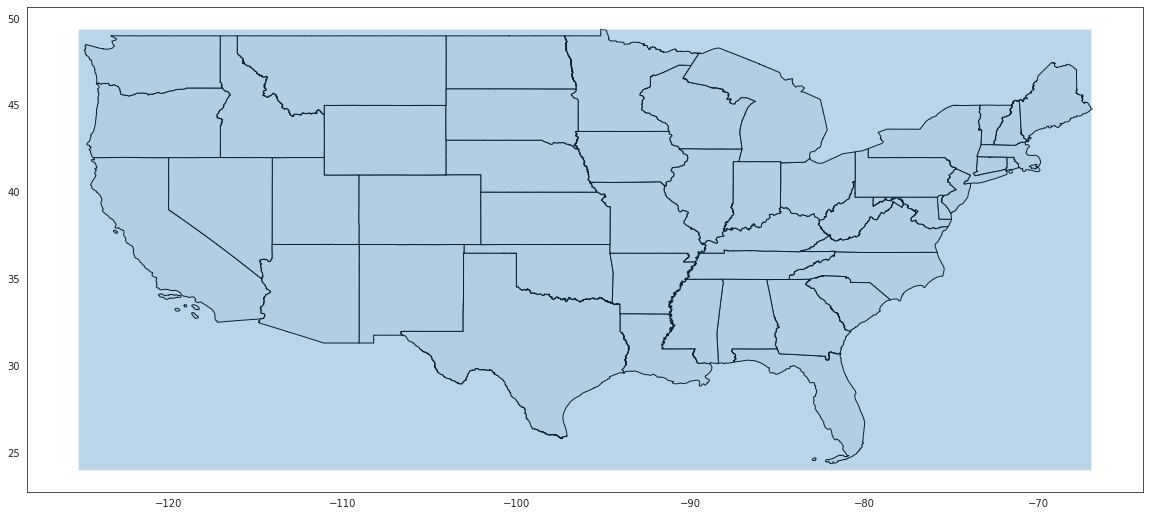

In [310]:
# Validate state borders, and that we drew our polygon correctly
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
latlong_limits.plot(alpha=.3,ax=ax)
plt.show()
plt.close()

## 2. Locations of existing turbines in the US

Shapefile obtained via the [US Wind Turbine Database](https://www.sciencebase.gov/catalog/item/57bdfd8fe4b03fd6b7df5ff9).

Besides location, this dataset contains information about each turbine (manufacturer, model, power capacity). Metadata is available via a .csv on the site--look for a link to a file named "EntityandAttribute_DataDictionary.csv".

__We can provide these variables to an unsupervised learning model__.

The output of the unsupervised learning model--a "turbine class", based on the attributes of the turbines from this dataset--could be a feature for a supervised learning model. In this iteration of my project, I'm using turbine_class to illustrate the types of turbines already in use in a given state, at a high level.

In [311]:
existing_turbines = gpd.read_file("./uswtdb_v2_2_20191004/uswtdb_v2_2_20191004.shp")

In [312]:
existing_turbines.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,geometry
0,3073403.0,missing,missing,5818.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352219,35.088993,POINT (-118.35222 35.08899)
1,3001002.0,missing,missing,4950.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.357185,35.086594,POINT (-118.35719 35.08659)
2,3005085.0,missing,missing,5773.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.353485,35.085896,POINT (-118.35349 35.08590)
3,3073404.0,missing,missing,5806.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352531,35.087852,POINT (-118.35253 35.08785)
4,3073401.0,missing,missing,5761.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.354652,35.085163,POINT (-118.35465 35.08516)


In [313]:
existing_turbines.crs

{'init': 'epsg:4269'}

In [314]:
# Limit to the 48 contiguous states. I wasn't able to convert with to_crs(),
# so if we need to perform operations that require the same CRS as the other datasets later,
# I'll have to figure that out.
existing_lower48 = existing_turbines.loc[(existing_turbines['ylat'] >= southernmost['lat']) & \
                                          (existing_turbines['ylat'] <= northernmost['lat']) & \
                                          (existing_turbines['xlong'] <= easternmost['long']) & \
                                          (existing_turbines['xlong'] >= westernmost['long'])].reset_index()

In [315]:
existing_turbines.shape

(60576, 25)

In [316]:
del existing_turbines

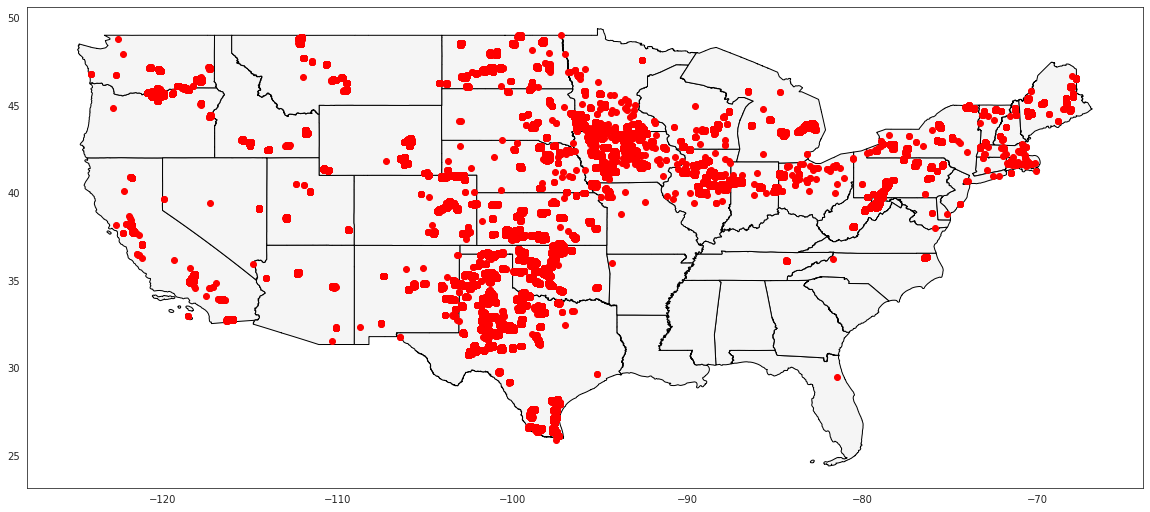

In [317]:
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
existing_lower48.plot(figsize=(15,15),ax=ax,color='red')
plt.show()
plt.close()

In [318]:
existing_lower48.drop('geometry',axis='columns').describe(include='all')

,index,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
count,60245.000000,6.024500e+04,60245,60245,60245.000000,60245,60245,60245,60245,60245.000000,60245.000000,60245.000000,60245,60245,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,38307,60245,60245.000000,60245.000000
unique,NaN,NaN,53096,52873,NaN,41,510,624,1474,NaN,NaN,NaN,70,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685,4,NaN,NaN
top,NaN,NaN,missing,missing,NaN,TX,Kern County,06029,unknown Tehachapi Wind Resource Area 1,NaN,NaN,NaN,GE Wind,GE1.5-77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,Digital Globe,NaN,NaN
freq,NaN,NaN,7116,6839,NaN,14719,4470,4470,1722,NaN,NaN,NaN,23429,9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4375,34584,NaN,NaN
mean,30274.894248,3.044790e+06,NaN,NaN,15150.681650,NaN,NaN,NaN,NaN,1960.081036,137.765408,-533.948997,NaN,NaN,947.537472,-937.545725,-774.215415,4913.031446,-898.039348,2.764727,2.920193,NaN,NaN,-100.903084,38.321071
std,17502.908205,2.442563e+04,NaN,NaN,20575.014819,NaN,NaN,NaN,NaN,762.686199,278.924123,2531.038601,NaN,NaN,2996.875487,3034.023233,2818.067718,5282.247615,3047.298109,0.566055,0.385315,NaN,NaN,11.273445,5.159793
min,0.000000,3.000001e+06,NaN,NaN,-9999.000000,NaN,NaN,NaN,NaN,-9999.000000,1.000000,-9999.000000,NaN,NaN,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,1.000000,1.000000,NaN,NaN,-124.068687,25.901937
25%,15079.000000,3.026210e+06,NaN,NaN,-9999.000000,NaN,NaN,NaN,NaN,2007.000000,50.000000,64.400000,NaN,NaN,1500.000000,78.000000,77.000000,4656.630000,115.200000,3.000000,3.000000,NaN,NaN,-104.053749,34.382423
50%,30298.000000,3.042037e+06,NaN,NaN,17909.000000,NaN,NaN,NaN,NaN,2010.000000,82.000000,120.000000,NaN,NaN,1650.000000,80.000000,82.500000,5345.620000,121.300000,3.000000,3.000000,NaN,NaN,-99.920990,38.075302
75%,45462.000000,3.061175e+06,NaN,NaN,33452.000000,NaN,NaN,NaN,NaN,2015.000000,120.000000,199.650000,NaN,NaN,2050.000000,80.000000,100.000000,7853.980000,131.400000,3.000000,3.000000,NaN,NaN,-95.332237,42.644791


In [319]:
existing_lower48.head()

,index,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,geometry
0,0,3073403.0,missing,missing,5818.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352219,35.088993,POINT (-118.35222 35.08899)
1,1,3001002.0,missing,missing,4950.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.357185,35.086594,POINT (-118.35719 35.08659)
2,2,3005085.0,missing,missing,5773.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.353485,35.085896,POINT (-118.35349 35.08590)
3,3,3073404.0,missing,missing,5806.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.352531,35.087852,POINT (-118.35253 35.08785)
4,4,3073401.0,missing,missing,5761.0,CA,Kern County,06029,251 Wind,1987.0,194.0,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,-9999.0,-9999.0,-9999.0,-9999.0,2.0,3.0,2018-05-08,Digital Globe,-118.354652,35.085163,POINT (-118.35465 35.08516)


Here we can see that Texas has the largest number of active turbines, with California in second place, but Iowa's overall mean output blows California's away. This is where classifying turbines by type and capacity will be useful.

In [320]:
existing_lower48['t_state'].value_counts().head(10)

TX    14719
CA     8119
IA     5027
OK     4031
KS     3199
IL     2787
MN     2499
CO     2289
OR     1917
WA     1735
Name: t_state, dtype: int64

In [321]:
existing_lower48.loc[(existing_lower48['t_state'] == 'TX'),['t_cap']].mean()

t_cap    992.528772
dtype: float64

In [322]:
existing_lower48.loc[(existing_lower48['t_state'] == 'CA'),['t_cap']].mean()

t_cap   -1817.113068
dtype: float64

In [323]:
existing_lower48.loc[(existing_lower48['t_state'] == 'IA'),['t_cap']].mean()

t_cap    1471.005769
dtype: float64

In an earlier iteration of this notebook, I dumped a file containing turbines in the contiguous 48 states to a new file. This file is augmented with additional features in one of the separate scripts I wrote. These scripts are discussed later in this notebook.

## 3. Existing transmission lines in the US

Transmission lines will be needed to carry turbine-generated power to customers, from potentially remote areas where wind farms are located. The locations of suitable lines are in this shapefile, retrieved from the [Homeland Infrastructure Foundation website](https://hifld-geoplatform.opendata.arcgis.com/datasets/electric-power-transmission-lines).

__Side note:__ it _really_ bothers me that detailed information about critical infrastructure was so easy to find online. I am all for open data, but this feels like a potentially major security risk.

In [324]:
power_lines = gpd.read_file("./Electric_Power_Transmission_Lines/Electric_Power_Transmission_Lines.shp")

In [325]:
power_lines.drop('geometry',axis=1).describe(include='all')

,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len
count,83207.000000,83207,83207,83207,83207,83207,83207,83207,83207,83207,83207,83207.000000,83207,83207,83207,83207,8.320700e+04
unique,NaN,83207,8,5,1,2,861,1081,4,1025,521,NaN,8,2,43366,41631,NaN
top,NaN,208032,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2017-01-01T00:00:00.000Z,IMAGERY,2017-01-01T00:00:00.000Z,NOT AVAILABLE,NaN,100-161,Y,NOT AVAILABLE,NOT AVAILABLE,NaN
freq,NaN,1,42700,65048,83207,83206,23334,2643,61956,2312,41093,NaN,41148,52048,510,4083,NaN
mean,41689.741500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-202629.610706,NaN,NaN,NaN,NaN,1.376408e+04
std,24064.359893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402092.208093,NaN,NaN,NaN,NaN,2.669033e+04
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999999.000000,NaN,NaN,NaN,NaN,1.765471e+00
25%,20851.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,1.347282e+03
50%,41694.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,NaN,NaN,NaN,NaN,6.043115e+03
75%,62539.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.000000,NaN,NaN,NaN,NaN,1.575590e+04


In [326]:
power_lines = power_lines.loc[power_lines['VOLTAGE'] > 0]

In [327]:
print(power_lines.crs)

{'init': 'epsg:4326'}


Identify high-voltage transmission lines--these are better-suited for conveying the power generated by a wind farm to customers. [Wikipedia](https://en.wikipedia.org/wiki/Electric_power_transmission) suggests lower-voltage lines are intended to deliver power to individual homes or businesses.

For now, we only care about lines that already exist, and lines under construction. We may choose to include proposed lines later, but given a lower weight for the model.

Join filtered power line data to our latitude/longitude limits, so we're only looking at lines for the lower 48 states.

In [328]:
high_power_lines = gpd.sjoin(power_lines.loc[(~power_lines['VOLT_CLASS'].isin(['UNDER 100','100-161','NOT AVAILABLE'])) &
                                   (power_lines['STATUS'].isin(['IN SERVICE','UNDER CONST']))],
                              latlong_limits)
high_power_lines.drop('index_right',axis='columns',inplace=True)

In [329]:
del power_lines

In [330]:
high_power_lines.columns

Index(['OBJECTID', 'ID', 'TYPE', 'STATUS', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'OWNER', 'VOLTAGE',
       'VOLT_CLASS', 'INFERRED', 'SUB_1', 'SUB_2', 'SHAPE__Len', 'geometry'],
      dtype='object')

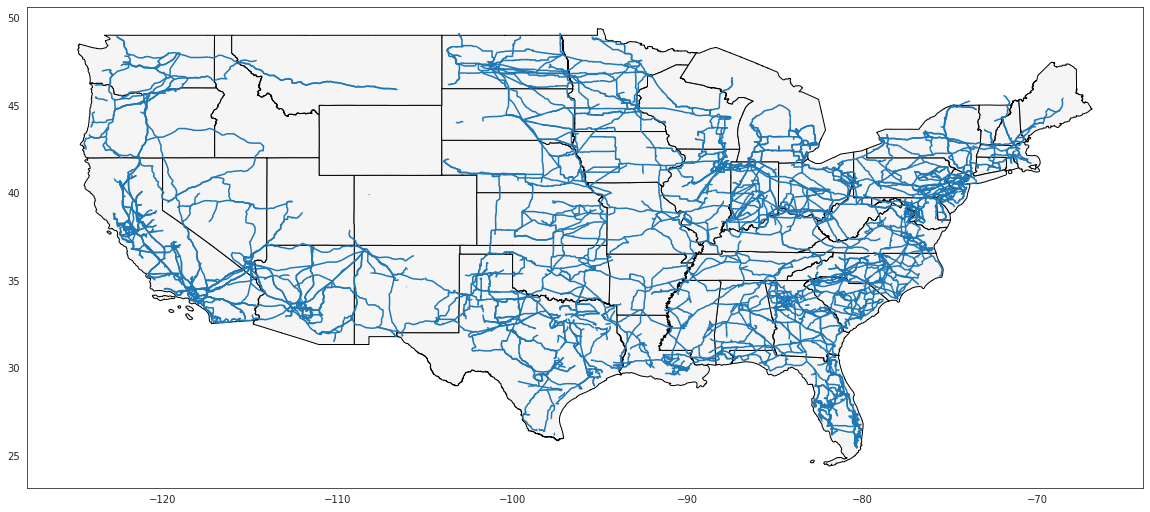

In [331]:
ax = lower48_borders.plot(figsize=(20,20),color='whitesmoke',edgecolor='black')
high_power_lines.plot(figsize=(15,15),ax=ax)
plt.show()
plt.close()

## 4. NREL wind / basic topography classification

I chose two datasets from [the Wind Data page of NREL's Geospatial Data Science site](https://www.nrel.gov/gis/data-wind.html). (NREL is the National Renewable Energy Laboratory.)

Mean wind speeds, as well as basic topography, determine the "wind power class" to which an area belongs:

> The conterminous United States was divided into grid cells 1/4 degree of latitude by 1/3 degree of
longitude. Each grid cell was assigned a wind power class ranging from 1 to 6, with 6 being the
windiest.

> Areas designated class 3 or greater are suitable for most utility-scale wind turbine applications,
whereas class 2 areas are marginal for utility-scale applications but may be suitable for rural
applications.

> The NREL-produced map data only apply to areas of low surface roughness (e.g., grassy plains) and exclude areas with slopes greater than 20%.

One dataset is labeled "no exclusions" and is purely based on consistent wind speed and topography as described in the excerpts above.

The other dataset is labeled "with exclusions"--exclusions include urban areas, parks and preserves, and land otherwise not suited to a wind farm. These areas are excluded entirely from the data.

There are two ID columns in the NREL datasets, 'gid' and 'id'--I couldn't find metadata explaining what they are, and unfortunately, the values of these columns do not line up between the NREL dataset with no exclusions, and the dataset with exclusions.

We can still make use of 'id'--we'll want to calculate some features using variables from other datasets, and we can add 'id' to those other datasets to serve as a link back to this one.

As a second ID column, and with no metadata, 'gid' serves no purpose and can be dropped.

To make these datasets easier to wrangle up front, I pre-processed them with a Python script that adds a 'state' column, drops 'gid', and writes records to individual files per state. 

Two other scripts were used for additional preprocessing--I will outline their work below. Developing and testing these scripts for preprocessing are what took the most time in this project by far. Geospatial calculations are extremely resource-intensive, requiring me to break datasets into much smaller chunks in order to accomplish anything useful on the limited resources of my laptop and home PC.

## Use clustering to create a turbine_class feature for our supervised learning model

The first task is to generate a turbine_class feature, describing the type of turbines best suited to a given area. This is a small enough task that I can perform it here in the notebook, but in a production environment this would be better suited to a separate script as well.

### Prep the turbine dataset for the unsupervised learning model

Not all of the features of the turbine dataset are needed for the unsupervised learning model. 

In [332]:
cluster_columns = ['p_year','p_tnum','p_cap','t_cap','t_hh','t_rd','t_conf_atr','t_conf_loc']

In [333]:
# Create a copy of the turbines dataframe with just the columns we want to feed to the clustering model
unsup_turbines = existing_lower48[cluster_columns]\
                                .copy(deep=True)

# Combine manufacturer and model--they are related. 
unsup_turbines['t_manu_model'] = existing_lower48['t_manu'] + '_' + existing_lower48['t_model']

```
# Double check for 0s, negative values, NaNs - fill in missing values. 
# Trying really hard to avoid dropping rows here, so everything ends up in a cluster at the end.
fill_p_year = unsup_turbines.loc[unsup_turbines['p_year'] > 1900,'p_year'].median()
unsup_turbines['p_year'] = unsup_turbines['p_year'].apply(lambda x: fill_p_year if x < 1900 else x)

unsup_turbines['p_cap'] = np.where(unsup_turbines['p_cap']>0, unsup_turbines['p_cap'],
                                   unsup_turbines['p_tnum'] * unsup_turbines['t_cap'] / 1000)

# Calculate a good multiplier we can use to estimate rotor diameter if we have hub height.
# We can use this to fill in values for t_rd where it has values < 0
fill_t_hh = unsup_turbines.loc[unsup_turbines['t_hh'] > 0,'t_hh'].median()
factor_t_rd = unsup_turbines.loc[unsup_turbines['t_rd'] > 0,'t_rd'].median() / fill_t_hh

# Fill in values for hub height and rotor diameter. Where we don't have a value for hub height, 
# the median will be used, and we'll calculate a value for rotor diameter based on that median.
# There are a few places where we have hub height but not rotor diameter, in which case we can just use that hh.
unsup_turbines['t_hh'] = unsup_turbines['t_hh'].apply(lambda x: fill_t_hh if x < 0 else x)
unsup_turbines['t_rd'] = np.where(unsup_turbines['t_rd']>0, unsup_turbines['t_rd'],
                                   unsup_turbines['t_hh'] * factor_t_rd)
```

I ran models with and without performing the cleanup above, wondering whether the models would simply place the turbines that have invalid values for attributes (represented as -9999 in this dataset) into their own cluster.

This seems to be mostly true, so in the interest of not polluting classes containing known values with a bunch of interpolated values, I chose to leave things be. We can confirm which class has the bulk of these turbines with unknown/invalid attributes, and maybe find some insights about them.

In [334]:
# Encode t_manu_model. Let's try label encoding first
tmm_encoder = LabelEncoder()
unsup_turbines['t_manu_model_enc'] = tmm_encoder.fit_transform(unsup_turbines['t_manu_model'])

In [335]:
unsup_turbines['t_manu_model_enc'].describe()

count    60245.000000
mean       150.618757
std         89.562152
min          0.000000
25%         64.000000
50%        135.000000
75%        245.000000
max        290.000000
Name: t_manu_model_enc, dtype: float64

In [336]:
unsup_turbines.describe(include='all')

,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_conf_atr,t_conf_loc,t_manu_model,t_manu_model_enc
count,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245.000000,60245,60245.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE Wind_GE1.5-77,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9470,NaN
mean,1960.081036,137.765408,-533.948997,947.537472,-937.545725,-774.215415,2.764727,2.920193,NaN,150.618757
std,762.686199,278.924123,2531.038601,2996.875487,3034.023233,2818.067718,0.566055,0.385315,NaN,89.562152
min,-9999.000000,1.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,1.000000,1.000000,NaN,0.000000
25%,2007.000000,50.000000,64.400000,1500.000000,78.000000,77.000000,3.000000,3.000000,NaN,64.000000
50%,2010.000000,82.000000,120.000000,1650.000000,80.000000,82.500000,3.000000,3.000000,NaN,135.000000
75%,2015.000000,120.000000,199.650000,2050.000000,80.000000,100.000000,3.000000,3.000000,NaN,245.000000


In [337]:
# Normalize the input
turbines_norm = pd.DataFrame(normalize(unsup_turbines.drop(['t_manu_model'],axis='columns')))

In [338]:
unsup_turbines.columns

Index(['p_year', 'p_tnum', 'p_cap', 't_cap', 't_hh', 't_rd', 't_conf_atr',
       't_conf_loc', 't_manu_model', 't_manu_model_enc'],
      dtype='object')

### Elbow method of determining the optimal number of clusters for a K-Means model

Text(0, 0.5, 'WCSS')

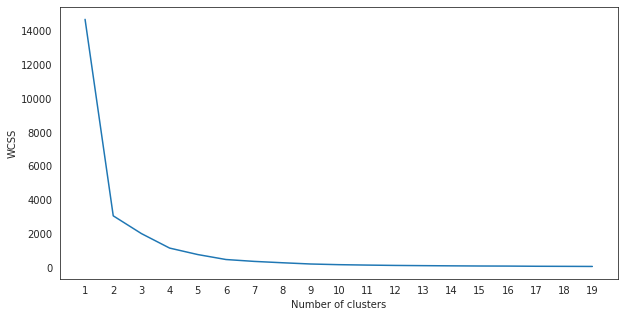

In [339]:
# Use the elbow method to find the optimal number of clusters.
wcss = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(turbines_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,20),wcss)
plt.xticks(np.arange(1,20,step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

There's an obvious "bend" at 2 clusters, and a smaller bend at 4. 

A silhouette plot and scores can also be used to confirm the best number of clusters for our unsupervised learning model. The silhouette scores for the K-Means model suggest the optimal number of clusters for it is 3. So the elbow method doesn't always seem to be the best way to estimate this model parameter?

In [340]:
n_clusters = 3

### K-Means clustering

I started with a quick, easy to understand way to classify turbines by their attributes.

In [341]:
km = KMeans(n_clusters)
km.fit(turbines_norm)
km_pred = km.predict(turbines_norm)

In [342]:
km_turbine_class = pd.Series(km_pred)
km_turbine_class.name = 'turbine_class'
km_turbine_class.value_counts()

0    47748
2     6413
1     6084
Name: turbine_class, dtype: int64

In [343]:
if 'turbine_class' in existing_lower48.columns:
    existing_lower48.drop('turbine_class',axis='columns',inplace=True)

In [344]:
existing_lower48 = existing_lower48.merge(km_turbine_class,
                                          how='inner',
                                          left_index=True,
                                          right_index=True)

### Evaluating unsupervised learning model performance

We can use PCA to reduce the feature set to two variables, which can be plotted. We can also see which features were most significant to the model.

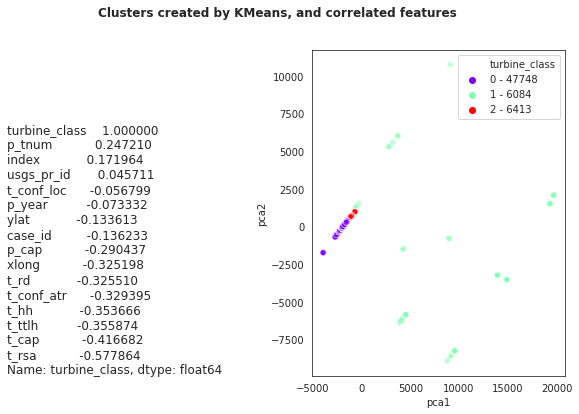

In [345]:
km_clust_pca = model_comparison(km,
                                existing_lower48,
                                unsup_turbines.drop('t_manu_model',axis='columns'),
                                km_turbine_class)

Silhouette plots and scores can direct us to the optimal number of clusters for a given model. This analysis measures the similarity between objects in the same cluster, compared to other clusters.

The optimal number of clusters will be associated with the highest silhouette score.

For n_clusters = 2 The average silhouette_score is : 0.937040096381389
For n_clusters = 3 The average silhouette_score is : 0.9520212249896041
For n_clusters = 4 The average silhouette_score is : 0.9475160216422872
For n_clusters = 5 The average silhouette_score is : 0.5839899512279239


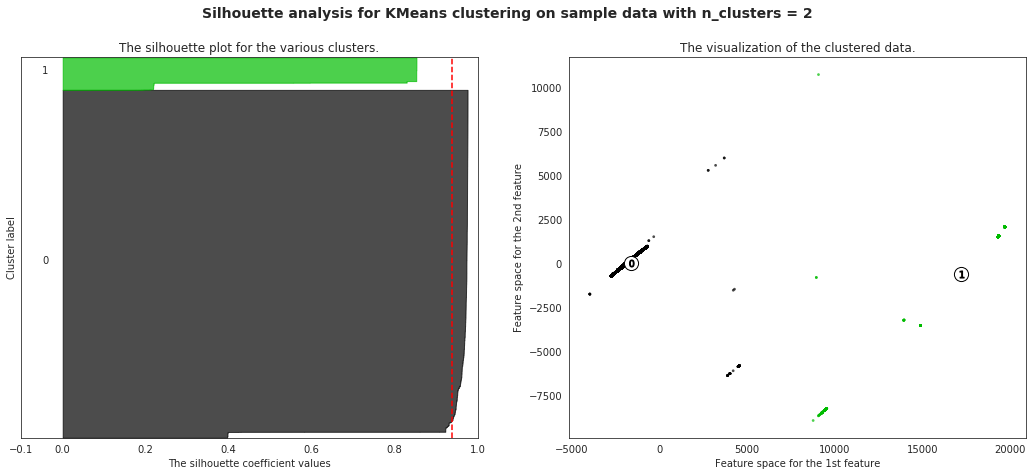

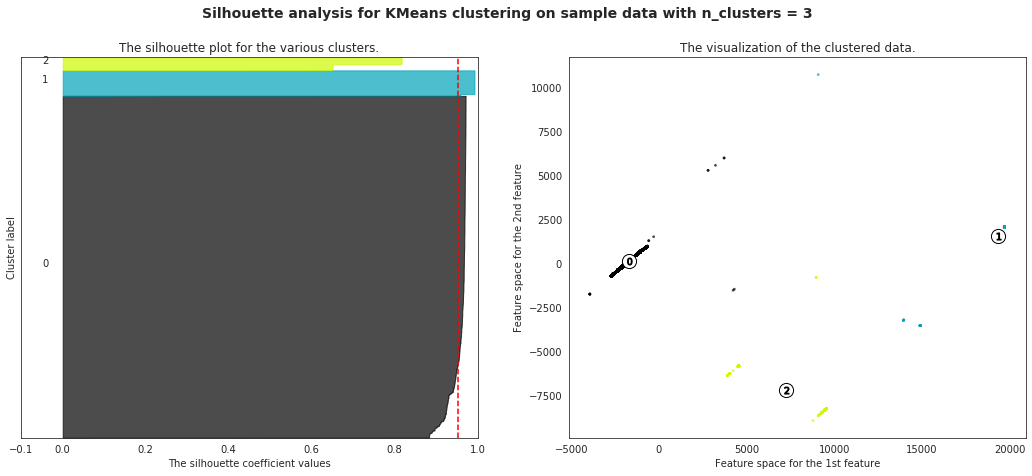

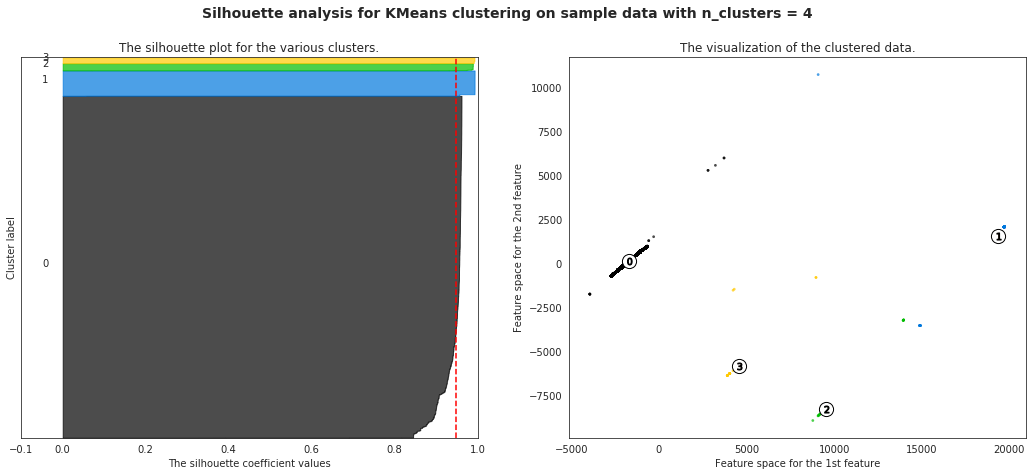

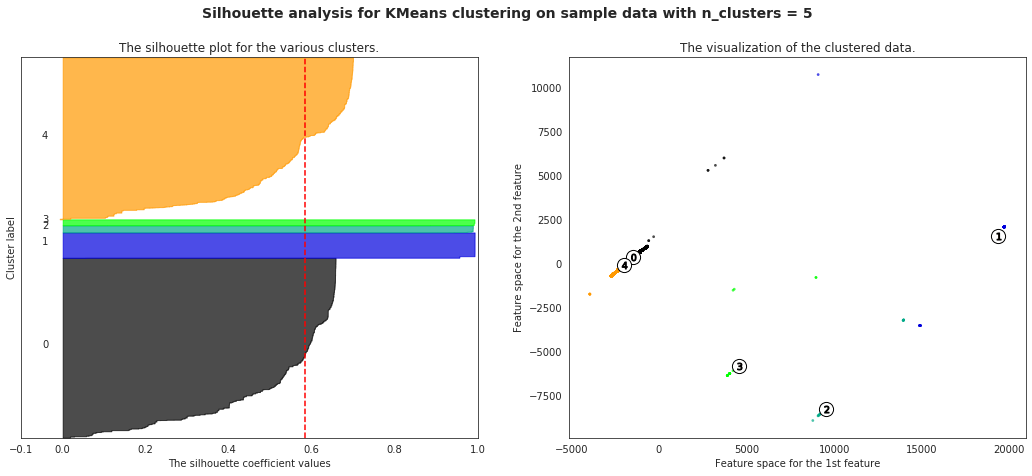

In [346]:
silhouette_plot(km_clust_pca,'km',[2,3,4,5])

__Because the silhouette analysis suggests an optimal number of 3 clusters, I used that value and reran the K-Means model.__

### HDBSCAN 
I had marginal luck with an HDBSCAN model in my unsupervised learning capstone, in part because of the "shape" of that dataset--the observations were tightly clustered, with few obvious boundaries between classes. For this project, I ran the K-means model first, noticed the observations of the turbine dataset are spread out a lot more, and thought I would give HDBSCAN another try.

Apparently the observations of the turbine dataset are _too_ spread out--with no tuning, the HDBSCAN model generated over 1,000 clusters. I forced it to choose clusters with a minimum of 3000 points. This resulted in four clusters, which is much more manageable.

Because I had to force this model to consolidate clusters, I wasn't sure whether its clusters had any real significance. I generally felt better about using the K-Means model.

In [347]:
hdb = hdbscan.HDBSCAN(min_cluster_size=3000, gen_min_span_tree=True)
hdb_pred = hdb.fit_predict(turbines_norm)

In [348]:
hdb_turbine_class = pd.Series(hdb_pred)
hdb_turbine_class.name = 'turbine_class'
hdb_turbine_class.value_counts()

 1    21177
 2    20601
-1    12386
 0     6081
Name: turbine_class, dtype: int64

### Here's how the turbine classes look.

<Figure size 432x288 with 0 Axes>

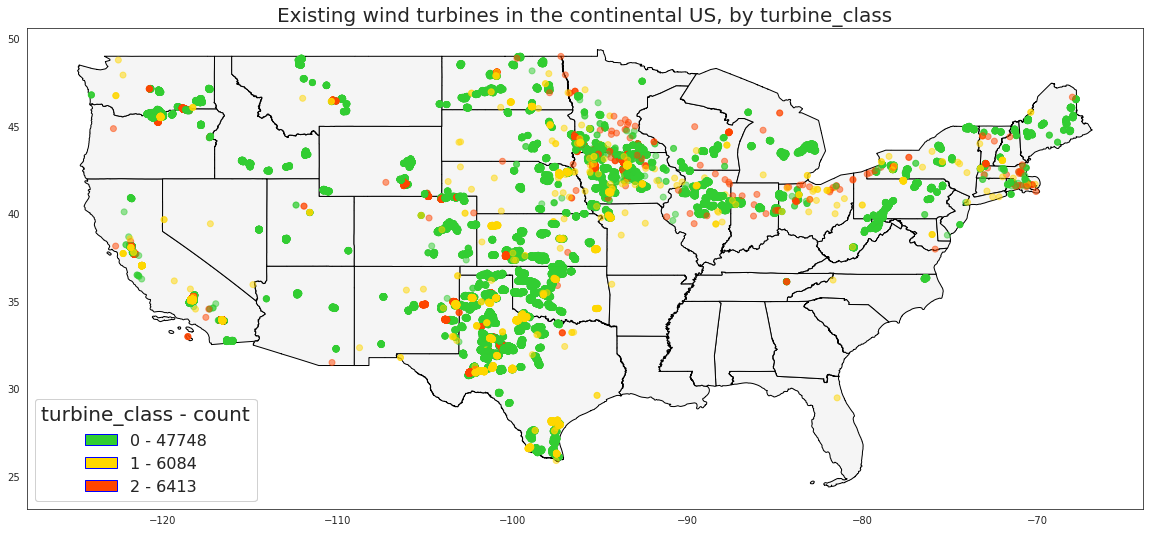

In [349]:
turbine_class_color_map(existing_lower48,lower48_borders)

### What differentiates the turbine classes?

The summary details provided by a .describe() can give us part of the answer:

In [350]:
for turbine_class in existing_lower48['turbine_class'].unique():
    print("Summary stats for turbine_class: {}".format(turbine_class))
    print(existing_lower48.loc[existing_lower48['turbine_class'] == turbine_class,cluster_columns].describe())

Summary stats for turbine_class: 1
            p_year       p_tnum        p_cap        t_cap         t_hh  \
count  6084.000000  6084.000000  6084.000000  6084.000000  6084.000000   
mean   1513.880506   562.491782 -6595.593463 -6565.088264 -9980.842867   
std    2353.519042   730.955129  4743.198342  4791.587258   426.666878   
min   -9999.000000     1.000000 -9999.000000 -9999.000000 -9999.000000   
25%    1982.000000    65.000000 -9999.000000 -9999.000000 -9999.000000   
50%    1985.000000   138.000000 -9999.000000 -9999.000000 -9999.000000   
75%    2017.000000  1722.000000     8.710000    90.000000 -9999.000000   
max    2019.000000  1722.000000    31.000000  1700.000000    80.000000   

              t_rd   t_conf_atr   t_conf_loc  
count  6084.000000  6084.000000  6084.000000  
mean  -8448.094642     1.314596     2.610125  
std    3623.778991     0.467568     0.784237  
min   -9999.000000     1.000000     1.000000  
25%   -9999.000000     1.000000     3.000000  
50%   -9999.0000

At a glance--__Class 1 is where the turbines with unknown attributes (-9999) landed.__

The other classes have some unknown values for usgs_pr_id, but values for all of the other attributes (height, capacity, turbine radius, etc.) are known.

Here are histograms of each feature fed to the unsupervised learning model, broken down by turbine_class. Let's use these plots to further analyze the types of turbines in each category:

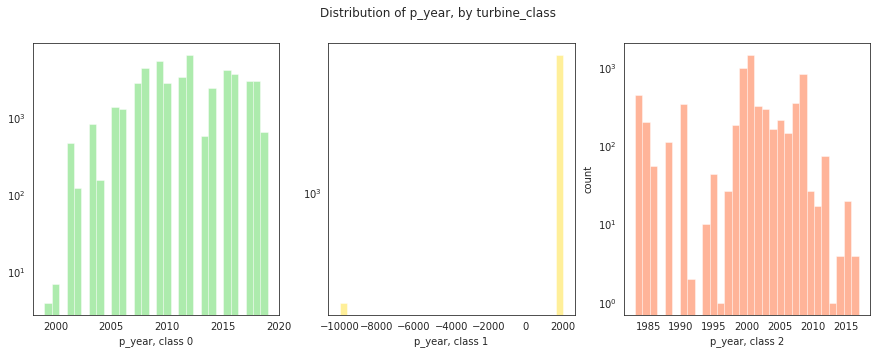

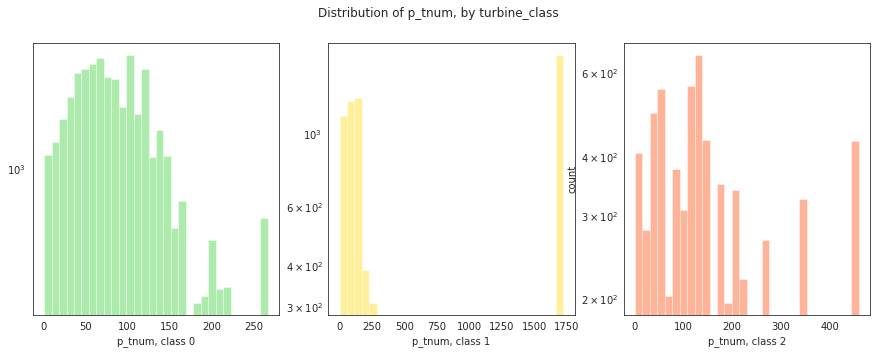

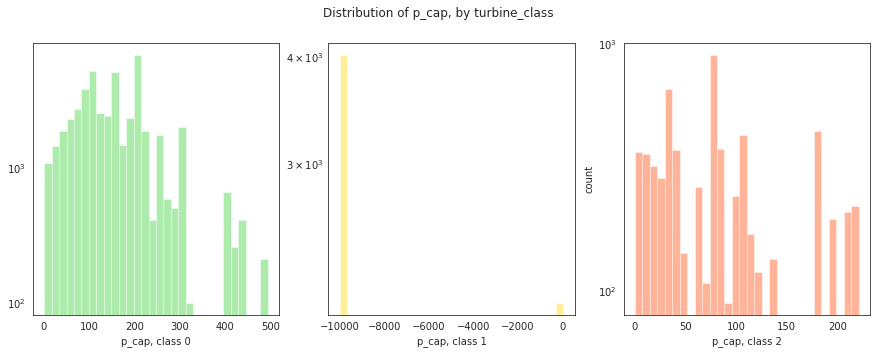

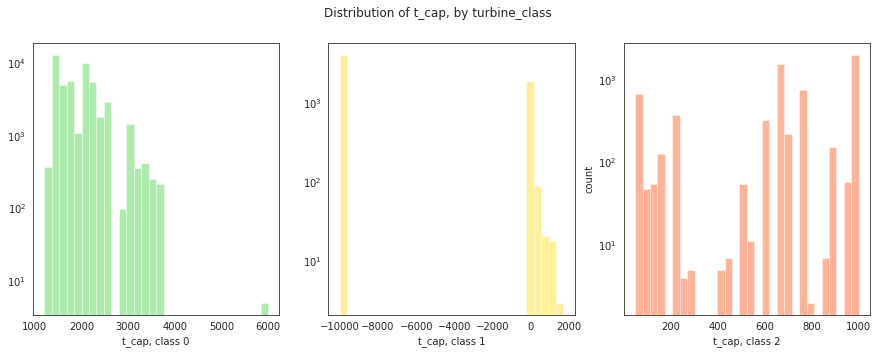

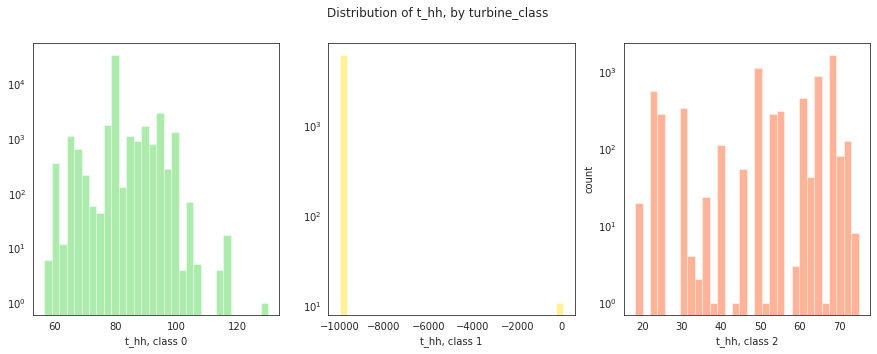

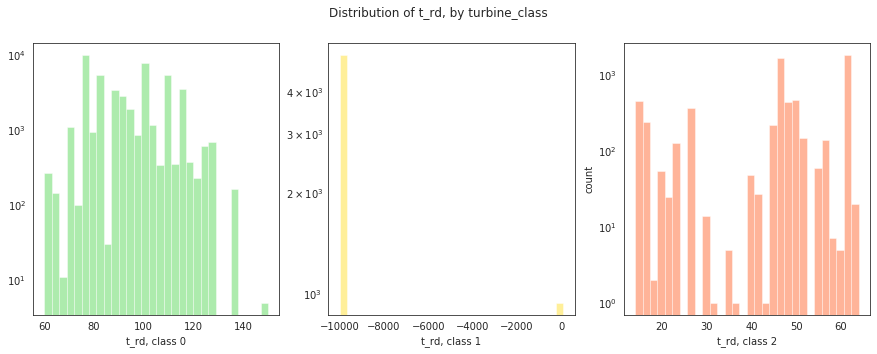

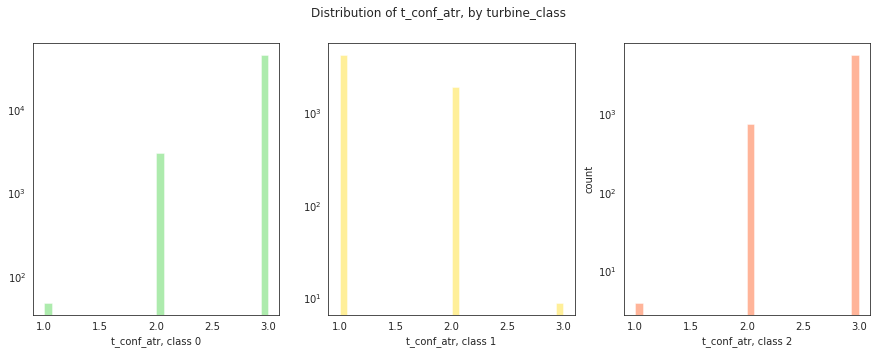

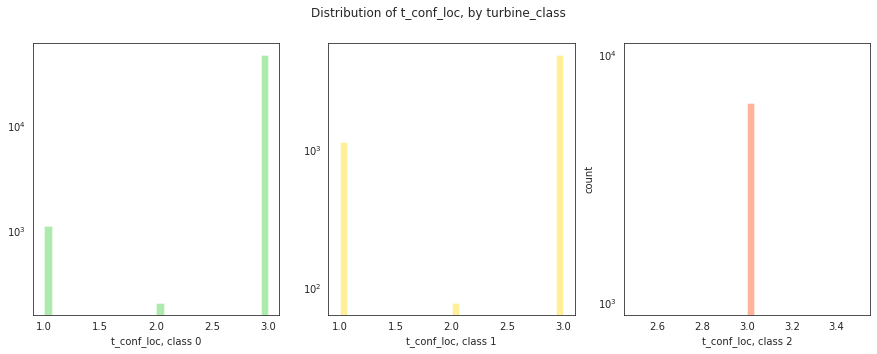

In [351]:
for feature in cluster_columns:
    score_distribution(existing_lower48,feature)

### The metadata can help clarify what each feature represents:
* __p_year: year project became operational__ - Class 2 has many of the oldest of the operational projects, and the widest age range, with a mean date of late 1999, and a larger standard deviation than Class 0, whose mean is mid-2011. Class 1 is where the turbines with an invalid year were grouped, but the handful of turbines with a known p_year have a range similar to Class 2.
* __p_tnum: number of turbines in project__ - Class 2 has larger projects than Class 0, on average. Class 1 has a bunch of smaller projects, and a few really large projects.
* __p_cap: project capacity (MW)__ - Class 0 has the higher-capacity projects on average (mean of 155/std dev of 87.2, vs. Class 2's mean of 81/std dev of 61.7). The project capacity for Class 1 is mostly unknown, and very small in the handful of instances where it is known.
* __t_cap: turbine capacity (kW)__ - Class 0 has the higher-output turbines, which makes sense, since we just saw that it has the higher project capacity too. Class 2 has a mean around 1/3 the size of Class 0. Where known, Class 1's turbine capacity tends to fall between Class 0 and Class 2.
* __t_hh: turbine hub height (meters)__ - Class 0 has taller turbines than Class 2. This is another feature where Class 1 is mostly unknown, but falling somewhere between Class 0 and Class 2, where known.
* __t_rd: turbine rotor diameter (meters)__ - Class 0's turbines have larger rotors than Class 2. Where known, Class 1 again falls somewhere between Class 0 and Class 2.
* __t_conf_atr, t_conf_loc: confidence in turbine characteristics and location__ - These two features indicate confidence in the other attributes. Class 2 and Class 0's attributes and locations are fairly well-established; Class 1, having so many unknown values, comes in a distant third.

### In short:
* Class 2 has more of the older projects, with more turbines per project, but with smaller turbines that have lower output capacity. 
* Class 0 has newer projects, that may be smaller, but which have larger turbines and higher output capacity. This is by far the largest class, with nearly eight times the number of turbines of the other two classes. 
* Class 1's attributes are mostly unknown, but seem to fall between Class 0 and Class 2 where known.

```
# I ran this to dump the turbines w/turbine_class to disk.
# This data is later divided by state in a preprocessing script.
existing_lower48.to_file('./existing_turbines.geojson',driver='GeoJSON')
```

## Preprocessing datasets--adding features in batch

Now that I have a target variable for the supervised learning model, I wanted to create additional features to help train it, using features from the NREL and transmission line datasets as well as the turbine data.

Processing geospatial data turned out to be _very_ resource intensive. I had major memory issues dealing with the large NREL wind datasets--there is simply too much data for my poor laptop to handle.

The easy tactic would have been to choose a single state, or a handful of states (which I ended up doing at the very end of this), but I was hoping to be able to process 48 states' worth to give the supervised learning models a lot of data on which to train.

I ended up writing three scripts, described below.

### nrel_add_state_and_centroid.py

The main task of this preprocessing script performs is to add features to both the turbine and NREL datasets based on either the location of a given turbine, or the centroid of each cell in the NREL data. Separate files for each state are written. 

### turbines_add_attributes.py, nrel_add_attributes.py

This script and its NREL counterpart add features to the turbines and NREL datasets for each state. Similar features are added to both datasets:

* The identity of, and distance to, the nearest transmission line from either a turbine's location, or the centroid of an NREL cell
* The number of transmission lines within 1 degree latitude/longitude of the point (turbine/centroid)
* The NREL wind_class from the dataset with exclusions
* (NREL dataset) the number of turbines within a given cell

Some cross-pollination takes place, where turbine attributes (example: the number of turbines per cell) are added to the NREL dataset, and an NREL wind_class is added to the turbines dataset.

#### Distance to the nearest transmission line

The distance from a point to the closest transmission line was calculated using a unary union of the entire transmission line dataset for a given state--so, multiple lines were combined into a single MultiLinestring object.

#### Attributes of the closest transmission line

Once the closest point on the closest line is established, a second operation is performed to identify the line intersecting this point, so some of this line's attributes can be copied to the NREL or turbine dataset (separate scripts process these datasets). This was the best way I could find to calculate not just the distance _to_ a line, but to find that closest line's attributes.

I ran into what I am sure is a bug in Geopandas: given a point, and a line, Geopandas' .intersects() function returns a point on the line closest to the other point. However, this closest point sometimes has a very-tiny-but-nonzero distance to the line, probably due to floating point errors during calculations. So, the closest point on the line does not always intersect the line! [I compiled a notebook demonstrating this issue for my mentor](https://github.com/iamjeremybe/thinkful_data_science/blob/master/Geospatial_data_calculating_distance.ipynb), using Massachusetts' turbines and transmission lines data.

The workaround is to find the closest point on the line, and instead of using .intersects(), I calculate the distance to all of the lines from a given point, then choose the line that is the shortest distance away. (It is ridiculous and resource-intensive, but it consistently works.)

#### Density of transmission lines

Another feature I was able to generate from the transmission line dataset is the density of lines for a given cell of the NREL dataset.
* First, determine a reasonable distance to look for transmission lines (1 degree latitude/longitude = ~69 miles);
* See how many lines fall within that distance from each point.

My thought was to weight these results, reasoning that more options for a given cell are favorable...but only to a point. Beyond this point, a high density of power lines probably represents an urban area, or some other feature that should be avoided (existing power generators for instance). This weight is left as future work.

#### Here's a quick demo of how this feature is generated.
This feature is calculated using the centroid of each cell of the NREL dataset.

In [352]:
sample_points = pd.DataFrame({'location': ['east of Las Vegas, NV','west of Pomeroy, IA'],
                                  'lat': [36.226916, 42.549746],
                                  'long': [-114.879848, -94.763612]})
g_sample_points = gpd.GeoDataFrame(sample_points,
                                         geometry=gpd.points_from_xy(sample_points['long'],
                                                                     sample_points['lat']))
g_sample_points.crs = {'init': 'epsg:4326'}

In [353]:
g_sample_points

,location,lat,long,geometry
0,"east of Las Vegas, NV",36.226916,-114.879848,POINT (-114.87985 36.22692)
1,"west of Pomeroy, IA",42.549746,-94.763612,POINT (-94.76361 42.54975)


This block of code transforms the two points into buffers of ~69 miles. We then join the resulting buffers to the original dataset so we can identify the buffers later.

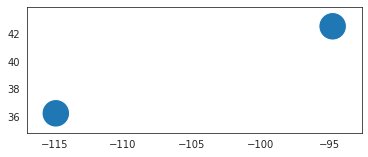

In [354]:
g_sample_buffer = g_sample_points['geometry'].buffer(1)
g_sample_buffer.name = 'geometry'
g_sample_69mi = g_sample_points.drop('geometry',axis='columns').join(g_sample_buffer)
g_sample_69mi.plot()

In [355]:
g_sample_69mi

,location,lat,long,geometry
0,"east of Las Vegas, NV",36.226916,-114.879848,"POLYGON ((-113.87985 36.22692, -113.88466 36.1..."
1,"west of Pomeroy, IA",42.549746,-94.763612,"POLYGON ((-93.76361 42.54975, -93.76843 42.451..."


Once buffers have been created for each point, join them to the set of high-power transmission lines to find candidates.

In [356]:
candidate_lines = gpd.sjoin(high_power_lines, g_sample_69mi, how='inner')

In [357]:
candidate_lines.loc[~candidate_lines['index_right'].isnull()]

,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len,geometry,index_right,location,lat,long
2053,3057,144138,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://nocapx2020.info...",2015-07-31T00:00:00.000Z,IMAGERY,2015-09-23T00:00:00.000Z,MIDAMERICAN ENERGY CO,345.0,345,N,LEHIGH,WEBSTER,31850.822173,"LINESTRING (-94.11650 42.37139, -94.11560 42.3...",1,"west of Pomeroy, IA",42.549746,-94.763612
15312,15348,157191,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, https://www.midamericanenergy.com/con...",2018-05-09T00:00:00.000Z,IMAGERY,2018-11-28T00:00:00.000Z,NOT AVAILABLE,345.0,345,N,KOSSUTH,WEBSTER,102680.763254,"LINESTRING (-94.15665 43.17010, -94.15604 43.1...",1,"west of Pomeroy, IA",42.549746,-94.763612
28252,28316,109217,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://nocapx2020.info...",2015-07-31T00:00:00.000Z,IMAGERY,2015-09-23T00:00:00.000Z,MIDAMERICAN ENERGY CO,345.0,345,N,LEHIGH,RAUN,252838.353065,"LINESTRING (-96.36546 42.32936, -96.36352 42.3...",1,"west of Pomeroy, IA",42.549746,-94.763612
35655,35737,161935,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, https://www.midamericanenergy.com/con...",2018-11-28T00:00:00.000Z,IMAGERY,2018-11-28T00:00:00.000Z,NOT AVAILABLE,345.0,345,N,KOSSUTH,O'BRIEN,163494.600497,"LINESTRING (-94.15665 43.17010, -94.15776 43.1...",1,"west of Pomeroy, IA",42.549746,-94.763612
48544,48657,131001,"AC, OVERHEAD",IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://nocapx2020.info...",2015-07-31T00:00:00.000Z,IMAGERY,2015-09-23T00:00:00.000Z,NOT AVAILABLE,345.0,345,N,GRIMES,LEHIGH,133873.803415,"LINESTRING (-94.11650 42.37139, -94.11679 42.3...",1,"west of Pomeroy, IA",42.549746,-94.763612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82788,82716,312811,AC,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00.000Z,IMAGERY/OTHER,2019-03-04T00:00:00.000Z,NEVADA POWER COMPANY,230.0,220-287,N,AMARGOSA,MEAD,24184.482856,"LINESTRING (-114.96909 36.02230, -114.96738 36...",0,"east of Las Vegas, NV",36.226916,-114.879848
82957,82885,312982,AC,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00.000Z,IMAGERY/OTHER,2019-03-04T00:00:00.000Z,NEVADA POWER COMPANY,500.0,500,N,MEAD,HARRY ALLEN (500KV),96253.715027,"LINESTRING (-114.83474 35.92781, -114.83850 35...",0,"east of Las Vegas, NV",36.226916,-114.879848
83069,82997,313097,AC,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00.000Z,IMAGERY/OTHER,2019-03-04T00:00:00.000Z,NEVADA POWER COMPANY,230.0,220-287,N,NEWPORT,EASTSIDE,19210.756926,"LINESTRING (-114.91838 36.02206, -114.91583 36...",0,"east of Las Vegas, NV",36.226916,-114.879848
83175,83103,313208,AC,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,Western Electricity Coordinating Council https...,2017-01-01T00:00:00.000Z,IMAGERY/OTHER,2017-01-01T00:00:00.000Z,NEVADA POWER COMPANY,230.0,220-287,N,MCCULLOUGH,MEAD,27341.685182,"LINESTRING (-115.01300 35.80392, -115.00557 35...",0,"east of Las Vegas, NV",36.226916,-114.879848


In [358]:
state_lines = gpd.sjoin(high_power_lines,lower48_borders[['STUSPS','geometry']],how='left')
state_lines.rename({'STUSPS': 'state'},axis='columns',inplace=True)

In [359]:
high_power_multipolygon = sop.unary_union(high_power_lines['geometry'])

In [360]:
candidate_lines['location'].value_counts()

east of Las Vegas, NV    107
west of Pomeroy, IA        5
Name: location, dtype: int64

107 high-power transmission lines within 69 miles of our point near Las Vegas is probably bad. I know this is because Hoover Dam and a solar farm are all within that 69-mile radius (not to mention the city of Las Vegas).

The 5 power lines close to our point west of Pomeroy, IA indicate a better location.

"Bad" density is likely to vary across the country--the cutoff for the weight I propose may require some spot checks and tuning to get right, and may need to be generated per area (state or region, like Midwest/West/Pacific Coast/etc.).

## Next up--use the output from the preprocessing scripts to train supervised learning models, and predict good candidate sites.

Because I handed off feature generation to a handful of external scripts, and memory is a concern, I'm going to handle supervised learning models and final predictions/analysis in a separate notebook.